# Setup

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import sys
sys.path.append("../../modules_HKlab/")
from state_machine import *

# Maze

In [248]:
class Maze():
    def __init__(self, curr_x, curr_y, wall_ends, goal_x=2, goal_y=0, max_x=4, max_y=4):
        self.curr_x = curr_x + 0.5
        self.curr_y = curr_y + 0.5
        self.init_x = self.curr_x
        self.init_y = self.curr_y
        self.goal_x = goal_x + 0.5
        self.goal_y = goal_y + 0.5
        self.max_x = max_x
        self.max_y = max_y
        self.wall_ends = wall_ends
        
    def set_position(self, curr_x, curr_y):
        self.curr_x = curr_x + 0.5
        self.curr_y = curr_y + 0.5
        
    def get_position(self):
        return self.curr_x, self.curr_y
    
    def get_goal(self):
        return self.goal_x, self.goal_y
        
    def move(self, direction, add, IsJump=False):
        plus=1 if add>0 else -1
        if IsJump==False:
            for i in range(abs(add)):
                if self.detect_collision(direction, plus)==0:
                    if direction=="h": self.curr_x += plus
                    elif direction=="v": self.curr_y += plus
                else: continue
        else:
            for i in range(abs(add)):
                if self.detect_collision(direction, plus)!=2:
                    if direction=="h": self.curr_x += plus
                    elif direction=="v": self.curr_y += plus
                else: continue  
        
    def detect_parallel(self, wall_end):
        if wall_end[0][0]==wall_end[1][0]: return "h"
        elif wall_end[0][1]==wall_end[1][1]: return "v"
        else: raise Exception
        
    def detect_collision(self, direction, add):
        if direction=="h": next_x = self.curr_x + add ; next_y = self.curr_y
        elif direction=="v": next_y = self.curr_y + add; next_x = self.curr_x
        for wall_end in self.wall_ends:
            wall_direction = self.detect_parallel(wall_end)
            if direction!=wall_direction:              
                if direction=="h": 
                    if ((wall_end[0][0]>wall_end[1][0]) and 
                    (wall_end[0][0]>self.curr_y) and (wall_end[1][0]<self.curr_y) and
                    ((self.curr_x-wall_end[0][1])*(next_x-wall_end[0][1])<0)):
                        return 1
                    elif ((wall_end[0][0]<wall_end[1][0]) and 
                    (wall_end[0][0]<self.curr_y) and (wall_end[1][0]>self.curr_y) and
                    ((self.curr_x-wall_end[0][1])*(next_x-wall_end[0][1])<0)):
                        return 1
                elif direction=="v": 
                    if ((wall_end[0][1]>wall_end[1][1]) and 
                    (wall_end[0][1]>self.curr_x) and (wall_end[1][1]<self.curr_x) and
                    ((self.curr_y-wall_end[0][0])*(next_y-wall_end[0][0])<0)):
                        return 1
                    elif ((wall_end[0][1]<wall_end[1][1]) and 
                    (wall_end[0][1]<self.curr_x) and (wall_end[1][1]>self.curr_x) and
                    ((self.curr_y-wall_end[0][0])*(next_y-wall_end[0][0])<0)):
                        return 1
        if (next_x<0 or next_x>self.max_x or next_y<0 or next_y>self.max_y): return 2
            
        return 0
        
    def plot(self, markersize=60):
        fig = plt.figure(figsize=(5, 5))
        ax = plt.gca()

        for wall_end in self.wall_ends:
            plt.plot(wall_end[0], wall_end[1], color='red', linewidth=2)

        for i in range(self.max_x):
            for j in range(self.max_y):
                plt.text(i+0.5, j+0.5, f"{j}{i}", ha="center")
        plt.text(self.init_x, self.init_y-0.2, 'START', ha='center')
        plt.text(self.goal_x, self.goal_y-0.2, 'GOAL', ha='center')

        ax.set_xlim(0, self.max_x)
        ax.set_ylim(0, self.max_y)
        plt.tick_params(axis='both', which='both', bottom=False, top=False,
                        labelbottom=False, right=False, left=False, labelleft=False)

        line, = ax.plot([self.curr_x], [self.curr_y], marker="o", color='g', markersize=markersize)
        plt.show()

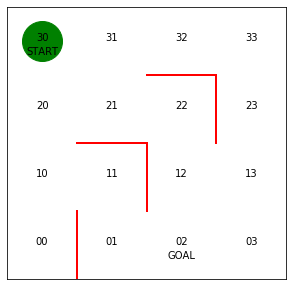

In [250]:
wall_ends = [[[1,1],[0,1]],[[1,2],[2,2]],[[2,2],[2,1]],[[3,2],[3,3]],[[3,3],[2,3]]]
maze = Maze(curr_x=0, curr_y=3, wall_ends=wall_ends)
maze.plot(markersize=40)
# maze.move("h", 2)
# maze.plot(markersize=40)

# State Machine

In [241]:
def SetupVariable(l):
    wall_ends = [[[1,1],[0,1]],[[1,2],[2,2]],[[2,2],[2,1]],[[3,2],[3,3]],[[3,3],[2,3]]]
    l["counter"] = 0
    l["IsReached"] = False
    l["flag"] = 0
    l["maze"] = Maze(curr_x=0, curr_y=3, wall_ends=wall_ends)
        
def AskMQ(l):
    while True:
        ans = input("move or quit?\n(y|q)  > ")
        if ans=="y" or ans=="Y": l["flag"]="y"; break
        elif ans=="q" or ans=="Q": l["flag"]="q"; break
        else: print("Invalid input. ReInput.")
        
def AskAction(l):
    while True:
        ans = input("jump one step(1)' or 'starate two step(2)'?\nchoise action (1|2)  > ")
        if ans=="1": l["flag"]="1"; break
        elif ans=="2": l["flag"]="2"; break
        else: print("Invalid input. ReInput.")
            
def ShowCurrentState(l):
    curr_state = l["maze"].get_position()
    goal = l["maze"].get_goal()
    print(f"Current state is {curr_state}.")
    print(f"Goal is {goal}.")
    l["maze"].plot(markersize=40)

In [242]:
def DecideDirection():
    while True:
        ans = input("where direction?\n(w|a|s|d)  > ")
        if ans not in ["w", "a", "s", "d"]: print("Invalid input. ReInput.")
        else: return ans

def Straight(l):
    direction = DecideDirection()
    if direction=="w": l["maze"].move("v", 2)
    if direction=="a": l["maze"].move("h", -2)
    if direction=="s": l["maze"].move("v", -2)
    if direction=="d": l["maze"].move("h", 2)
    l["counter"] += 1

def Jump(l):
    direction = DecideDirection()
    if direction=="w": l["maze"].move("v", 1, IsJump=True)
    if direction=="a": l["maze"].move("h", -1, IsJump=True)
    if direction=="s": l["maze"].move("v", -1, IsJump=True)
    if direction=="d": l["maze"].move("h", 1, IsJump=True)
    l["counter"] += 1
    
def DetectReaching(l):
    curr_state = l["maze"].get_position()
    goal = l["maze"].get_goal()
    if curr_state[0]==goal[0] and curr_state[1]==goal[1]:
        l["IsReached"]=True
    print(f"Current counter: {l['counter']}")

In [243]:
def MoveSM(l):
    sm = TStateMachine()
    sm.StartState = "ask_action_phase"
    sm["ask_action_phase"] = TFSMState()
    sm["ask_action_phase"].EntryAction = lambda: AskAction(l)
    sm["ask_action_phase"].NewAction()
    sm["ask_action_phase"].Actions[-1].Condition = lambda: True if l["flag"]=="1" else False
    sm["ask_action_phase"].Actions[-1].NextState = "jump_1step_phase"
    sm["ask_action_phase"].NewAction()
    sm["ask_action_phase"].Actions[-1].Condition = lambda: True if l["flag"]=="2" else False 
    sm["ask_action_phase"].Actions[-1].NextState = "straight_2step_phase"
    
    sm["jump_1step_phase"] = TFSMState()
    sm["jump_1step_phase"].EntryAction = lambda: [Jump(l), ShowCurrentState(l)]
    sm["jump_1step_phase"].ElseAction.Condition = lambda: True
    sm["jump_1step_phase"].ElseAction.NextState = "detect_reaching_phase"
    
    sm["straight_2step_phase"] = TFSMState()
    sm["straight_2step_phase"].EntryAction = lambda: [Straight(l), ShowCurrentState(l)]
    sm["straight_2step_phase"].ElseAction.Condition = lambda: True
    sm["straight_2step_phase"].ElseAction.NextState = "detect_reaching_phase"
    
    sm["detect_reaching_phase"] = TFSMState()
    sm["detect_reaching_phase"].EntryAction = lambda: DetectReaching(l)
    sm["detect_reaching_phase"].ElseAction.Condition = lambda: True
    sm["detect_reaching_phase"].ElseAction.NextState = EXIT_STATE
    
    sm.Run()

In [244]:
def RunMaze():
    l = defaultdict(lambda: None)

    sm = TStateMachine()
    sm.StartState = "start"
    sm["start"] = TFSMState()
    sm["start"].EntryAction = lambda: [SetupVariable(l), ShowCurrentState(l)]
    sm["start"].ElseAction.Condition = lambda: True
    sm["start"].ElseAction.NextState = "ask_mq"

    sm["ask_mq"] = TFSMState()
    sm["ask_mq"].EntryAction = lambda: AskMQ(l)
    sm["ask_mq"].NewAction()
    sm["ask_mq"].Actions[-1].Condition = lambda: True if l["flag"]=="y" else False
    sm["ask_mq"].Actions[-1].NextState = "move"
    sm["ask_mq"].NewAction()
    sm["ask_mq"].Actions[-1].Condition = lambda: True if l["flag"]=="q" else False
    sm["ask_mq"].Actions[-1].Action = lambda: print('Finishing state machine')
    sm["ask_mq"].Actions[-1].NextState = EXIT_STATE

    sm["move"] = TFSMState()
    sm["move"].EntryAction = lambda: MoveSM(l)
    sm["move"].NewAction()
    sm["move"].Actions[-1].Condition = lambda: False if l["IsReached"] else True
    sm["move"].Actions[-1].NextState = "ask_mq"
    sm["move"].ElseAction.Condition = lambda: True
    sm["move"].ElseAction.NextState = "reached"

    sm["reached"] = TFSMState()
    sm["reached"].EntryAction = lambda: print("Reached Goal.")
    sm["reached"].ElseAction.Condition = lambda: True
    sm["reached"].ElseAction.NextState = EXIT_STATE

    sm.Run()

Current state is (0.5, 3.5).
Goal is (2.5, 0.5).


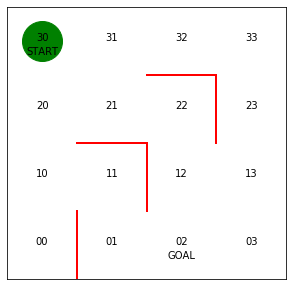

move or quit?
(y|q)  > y
jump one step(1)' or 'starate two step(2)'?
choise action (1|2)  > 2
where direction?
(w|a|s|d)  > s
Current state is (0.5, 1.5).
Goal is (2.5, 0.5).


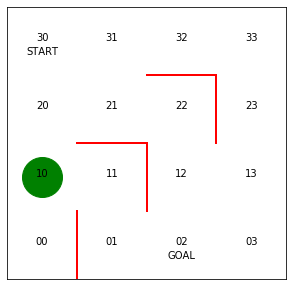

Current counter: 1
move or quit?
(y|q)  > y
jump one step(1)' or 'starate two step(2)'?
choise action (1|2)  > 2
where direction?
(w|a|s|d)  > r
Invalid input. ReInput.
where direction?
(w|a|s|d)  > d
Current state is (1.5, 1.5).
Goal is (2.5, 0.5).


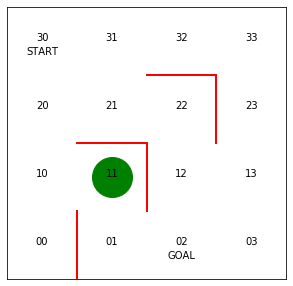

Current counter: 2
move or quit?
(y|q)  > y
jump one step(1)' or 'starate two step(2)'?
choise action (1|2)  > 1
where direction?
(w|a|s|d)  > d
Current state is (2.5, 1.5).
Goal is (2.5, 0.5).


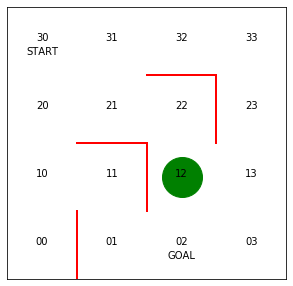

Current counter: 3
move or quit?
(y|q)  > y
jump one step(1)' or 'starate two step(2)'?
choise action (1|2)  > 1
where direction?
(w|a|s|d)  > s
Current state is (2.5, 0.5).
Goal is (2.5, 0.5).


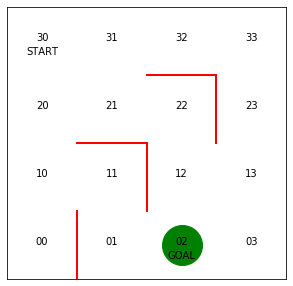

Current counter: 4
Reached Goal.


In [251]:
RunMaze()